In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow.keras.datasets.cifar10 as cifar
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Loading Dataset

In [ ]:
dataset = cifar.load_data()

train_data, train_label = dataset[0]
test_data, test_label = dataset[1]
print('{} train sample'.format(train_data.shape[0]))
print('{} test sample'.format(test_data.shape[0]))

170500096/170498071 [==============================] - 2s 0us/step
50000 train sample
10000 test sample


## Preprocess

In [ ]:
X_train = train_data.astype(np.float64)
X_test = test_data.astype(np.float64)

X_train /= 255.0
X_test /= 255.0

In [ ]:
y_train, y_test = train_label, test_label
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Define Model

In [ ]:
model = Sequential(name="MyConvNet")
## 32*32*3
model.add(Conv2D(16, (3, 3), padding='same', activation='relu' ,input_shape=X_train.shape[1:], name="conv11"))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', name="conv12"))
model.add(MaxPooling2D(pool_size=(2, 2), name="pooling1"))
## 16*16*32
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name='conv21'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name='conv22'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pooling2'))
## 8*8*64
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name='conv31'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name='conv32'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pooling3'))
## 4*4*128
model.add(Flatten())
## 2048
model.add(Dense(1024, activation='relu', name='FC1'))
model.add(Dense(512, activation='relu', name='FC2'))
model.add(Dense(10, activation='softmax', name='FC3'))

model.summary()

Model: "MyConvNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv11 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv12 (Conv2D)              (None, 32, 32, 16)        2320      
_________________________________________________________________
pooling1 (MaxPooling2D)      (None, 16, 16, 16)        0         
_________________________________________________________________
conv21 (Conv2D)              (None, 16, 16, 32)        4640      
_________________________________________________________________
conv22 (Conv2D)              (None, 16, 16, 32)        9248      
_________________________________________________________________
pooling2 (MaxPooling2D)      (None, 8, 8, 32)          0         
_________________________________________________________________
conv31 (Conv2D)              (None, 8, 8, 64)          18

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)


In [ ]:
history = model.fit(X_train, y_train,
              batch_size=128,
              epochs=50,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=[])

Epoch 1/50
391/391 [==============================] - 37s 11ms/step - loss: 1.9909 - accuracy: 0.2781 - val_loss: 1.5962 - val_accuracy: 0.4335
Epoch 2/50
391/391 [==============================] - 4s 9ms/step - loss: 1.5157 - accuracy: 0.4549 - val_loss: 1.4267 - val_accuracy: 0.4862
Epoch 3/50
391/391 [==============================] - 3s 9ms/step - loss: 1.3782 - accuracy: 0.5054 - val_loss: 1.3200 - val_accuracy: 0.5234
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 1.2882 - accuracy: 0.5427 - val_loss: 1.2086 - val_accuracy: 0.5708
Epoch 5/50
391/391 [==============================] - 4s 9ms/step - loss: 1.1911 - accuracy: 0.5755 - val_loss: 1.1782 - val_accuracy: 0.5780
Epoch 6/50
391/391 [==============================] - 4s 9ms/step - loss: 1.1425 - accuracy: 0.5971 - val_loss: 1.1181 - val_accuracy: 0.6007
Epoch 7/50
391/391 [==============================] - 4s 9ms/step - loss: 1.0793 - accuracy: 0.6203 - val_loss: 1.1154 - val_accuracy: 0.6103
Epoc

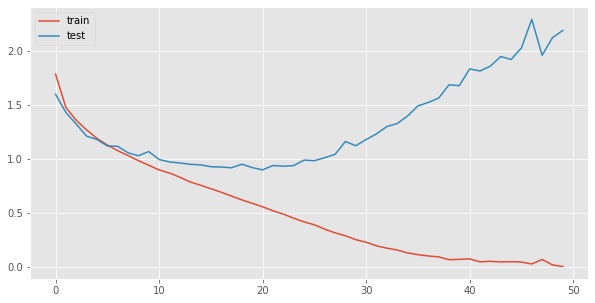

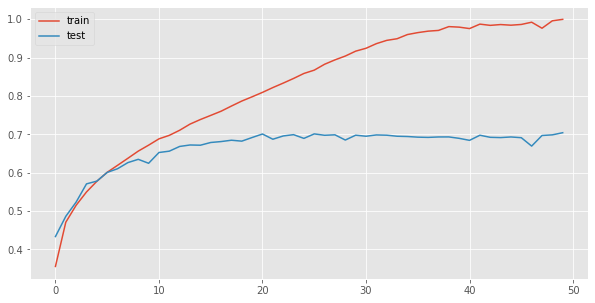

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

## Two Conv Layer

In [ ]:
model = Sequential(name="2Layer")
## 32*32*3
model.add(Conv2D(16, (3, 3), padding='same', activation='relu' ,input_shape=X_train.shape[1:], name="conv11"))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', name="conv12"))
model.add(MaxPooling2D(pool_size=(2, 2), name="pooling1"))
## 16*16*32
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name='conv21'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name='conv22'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pooling2'))
model.add(Flatten())
## 2048
model.add(Dense(1024, activation='relu', name='FC1'))
model.add(Dense(512, activation='relu', name='FC2'))
model.add(Dense(10, activation='softmax', name='FC3'))

opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)


history2 = model.fit(X_train, y_train,
              batch_size=128,
              epochs=30,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=[])

Epoch 1/30
391/391 [==============================] - 4s 10ms/step - loss: 1.9556 - accuracy: 0.2908 - val_loss: 1.4990 - val_accuracy: 0.4707
Epoch 2/30
391/391 [==============================] - 3s 9ms/step - loss: 1.4686 - accuracy: 0.4759 - val_loss: 1.3328 - val_accuracy: 0.5268
Epoch 3/30
391/391 [==============================] - 3s 9ms/step - loss: 1.3102 - accuracy: 0.5349 - val_loss: 1.2306 - val_accuracy: 0.5640
Epoch 4/30
391/391 [==============================] - 3s 9ms/step - loss: 1.2083 - accuracy: 0.5743 - val_loss: 1.1756 - val_accuracy: 0.5890
Epoch 5/30
391/391 [==============================] - 3s 9ms/step - loss: 1.1326 - accuracy: 0.6009 - val_loss: 1.1235 - val_accuracy: 0.6010
Epoch 6/30
391/391 [==============================] - 3s 9ms/step - loss: 1.0688 - accuracy: 0.6267 - val_loss: 1.0932 - val_accuracy: 0.6130
Epoch 7/30
391/391 [==============================] - 3s 9ms/step - loss: 1.0151 - accuracy: 0.6460 - val_loss: 1.0334 - val_accuracy: 0.6384
Epoch

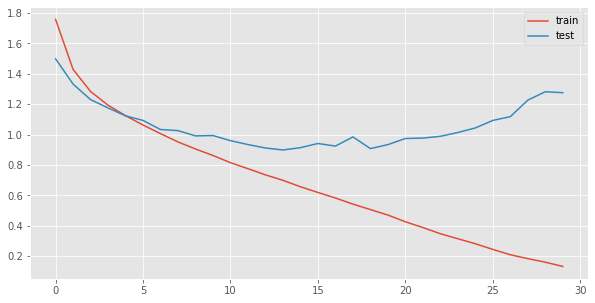

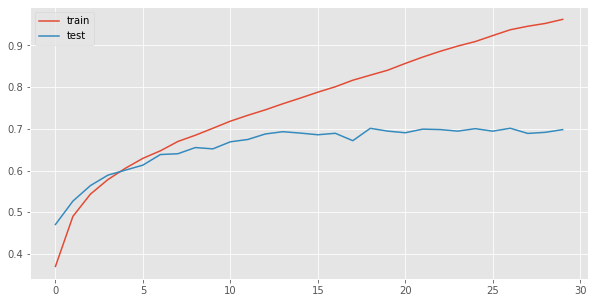

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

## One Conv Layer

In [ ]:
model = Sequential(name="1Layer")
## 32*32*3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu' ,input_shape=X_train.shape[1:], name="conv11"))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu' ,name="conv12"))
model.add(MaxPooling2D(pool_size=(2, 2), name="pooling1"))
## 16*16*32
model.add(Flatten())
## 2048
model.add(Dense(1024, activation='relu', name='FC1'))
model.add(Dense(512, activation='relu', name='FC2'))
model.add(Dense(10, activation='softmax', name='FC3'))

opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)


history1 = model.fit(X_train, y_train,
              batch_size=128,
              epochs=30,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=[])

Epoch 1/30
391/391 [==============================] - 5s 12ms/step - loss: 1.8591 - accuracy: 0.3356 - val_loss: 1.4081 - val_accuracy: 0.4930
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 1.3439 - accuracy: 0.5259 - val_loss: 1.2162 - val_accuracy: 0.5686
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.1599 - accuracy: 0.5922 - val_loss: 1.1274 - val_accuracy: 0.5996
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0408 - accuracy: 0.6358 - val_loss: 1.0571 - val_accuracy: 0.6325
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9608 - accuracy: 0.6667 - val_loss: 1.0070 - val_accuracy: 0.6453
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.8787 - accuracy: 0.6944 - val_loss: 1.0197 - val_accuracy: 0.6374
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.8152 - accuracy: 0.7167 - val_loss: 0.9480 - val_accuracy: 0.6696

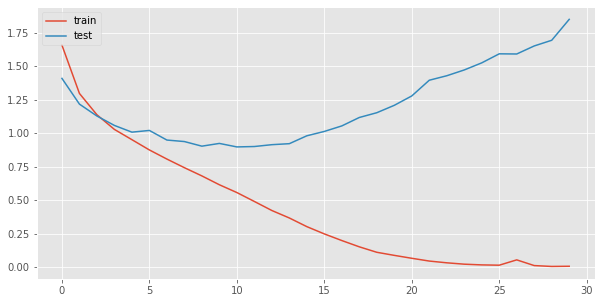

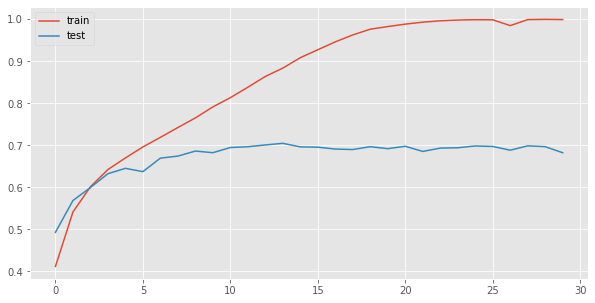

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

## Zero Conv Layer

In [ ]:
model = Sequential(name="0Layer")
## 32*32*3
model.add(Flatten())
## 2048
model.add(Dense(1024, activation='relu', name='FC1'))
model.add(Dense(512, activation='relu', name='FC2'))
model.add(Dense(10, activation='softmax', name='FC3'))

opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)


history0 = model.fit(X_train, y_train,
              batch_size=128,
              epochs=50,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=[])

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 1.9311 - accuracy: 0.3080 - val_loss: 1.6856 - val_accuracy: 0.4024
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6597 - accuracy: 0.4114 - val_loss: 1.6010 - val_accuracy: 0.4259
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 1.5573 - accuracy: 0.4512 - val_loss: 1.5409 - val_accuracy: 0.4566
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.5024 - accuracy: 0.4732 - val_loss: 1.4851 - val_accuracy: 0.4757
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 1.4421 - accuracy: 0.4933 - val_loss: 1.4618 - val_accuracy: 0.4763
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.4124 - accuracy: 0.5049 - val_loss: 1.4631 - val_accuracy: 0.4842
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3617 - accuracy: 0.5214 - val_loss: 1.4438 - val_accuracy: 0.4761
Epoch 

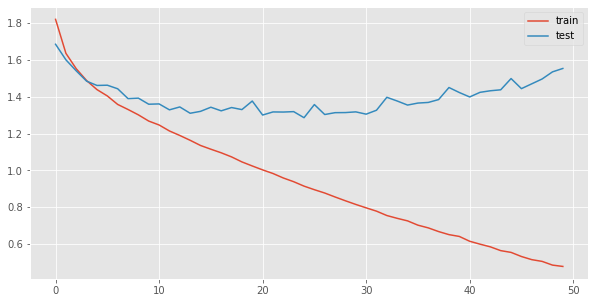

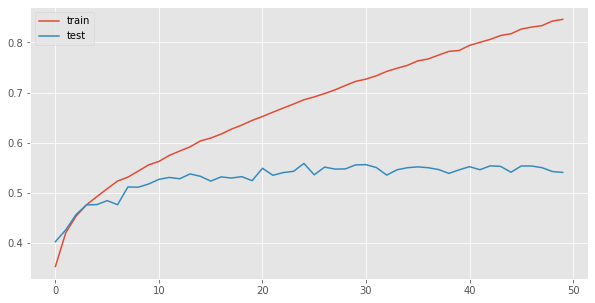

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

## Create Model

In [ ]:
def createModel(activation='relu'):
  model = Sequential(name="MyConvNet")
  ## 32*32*3
  model.add(Conv2D(32, (3, 3), padding='same', activation=activation ,input_shape=X_train.shape[1:], name="conv11"))
  model.add(MaxPooling2D(pool_size=(2, 2), name="pooling1"))
  ## 16*16*32
  model.add(Conv2D(64, (3, 3), padding='same', activation=activation, name='conv21'))
  model.add(MaxPooling2D(pool_size=(2, 2), name='pooling2'))
  ## 8*8*64
  model.add(Conv2D(128, (3, 3), padding='same', activation=activation, name='conv31'))
  model.add(MaxPooling2D(pool_size=(2, 2), name='pooling3'))
  ## 4*4*128
  model.add(Flatten())
  ## 2048
  model.add(Dense(1024, activation='relu', name='FC1'))
  model.add(Dense(512, activation='relu', name='FC2'))
  model.add(Dense(10, activation='softmax', name='FC3'))
  return model


## Activation Function

In [ ]:
test_m = createModel()
test_m.summary()

Model: "MyConvNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv11 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
pooling1 (MaxPooling2D)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv21 (Conv2D)              (None, 16, 16, 64)        18496     
_________________________________________________________________
pooling2 (MaxPooling2D)      (None, 8, 8, 64)          0         
_________________________________________________________________
conv31 (Conv2D)              (None, 8, 8, 128)         73856     
_________________________________________________________________
pooling3 (MaxPooling2D)      (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0 

In [ ]:
relu_m = createModel()
tanh_m = createModel(activation='tanh')
sigmoid_m = createModel(activation='sigmoid')

opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
relu_m.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)
tanh_m.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)
sigmoid_m.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)

history_relu = relu_m.fit(X_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=[])
history_tanh = tanh_m.fit(X_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=[])
history_sigmoid = sigmoid_m.fit(X_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=[])

Epoch 1/10
391/391 [==============================] - 36s 9ms/step - loss: 1.9528 - accuracy: 0.2965 - val_loss: 1.4752 - val_accuracy: 0.4675
Epoch 2/10
391/391 [==============================] - 3s 8ms/step - loss: 1.4356 - accuracy: 0.4837 - val_loss: 1.3206 - val_accuracy: 0.5280
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.2966 - accuracy: 0.5358 - val_loss: 1.2394 - val_accuracy: 0.5541
Epoch 4/10
391/391 [==============================] - 3s 8ms/step - loss: 1.1899 - accuracy: 0.5796 - val_loss: 1.1458 - val_accuracy: 0.5858
Epoch 5/10
391/391 [==============================] - 3s 8ms/step - loss: 1.1158 - accuracy: 0.6057 - val_loss: 1.0813 - val_accuracy: 0.6170
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 1.0367 - accuracy: 0.6334 - val_loss: 1.0540 - val_accuracy: 0.6269
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 0.9886 - accuracy: 0.6511 - val_loss: 0.9969 - val_accuracy: 0.6566
Epoch

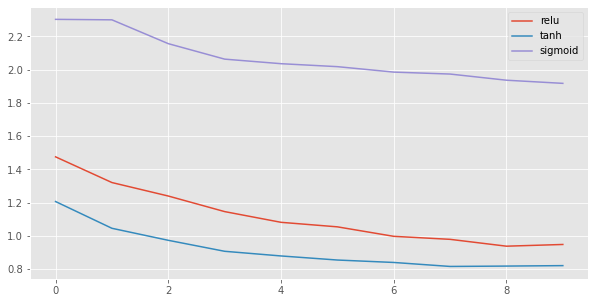

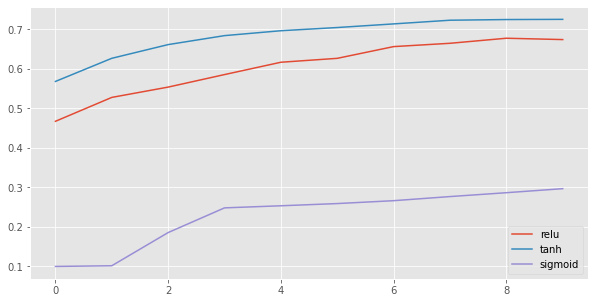

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_relu.history['val_loss'])
plt.plot(history_tanh.history['val_loss'])
plt.plot(history_sigmoid.history['val_loss'])
plt.legend(['relu', 'tanh', 'sigmoid'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_relu.history['val_accuracy'])
plt.plot(history_tanh.history['val_accuracy'])
plt.plot(history_sigmoid.history['val_accuracy'])
plt.legend(['relu', 'tanh', 'sigmoid'])
plt.show()

## Optimizers

In [ ]:
adam_m = createModel()
sgd_m = createModel()

adam_m.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],)
sgd_m.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'],)

history_adam = adam_m.fit(X_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=False)
history_sgd = sgd_m.fit(X_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=False)

Epoch 1/10
391/391 [==============================] - 4s 9ms/step - loss: 1.7362 - accuracy: 0.3567 - val_loss: 1.0734 - val_accuracy: 0.6196
Epoch 2/10
391/391 [==============================] - 3s 8ms/step - loss: 1.0409 - accuracy: 0.6300 - val_loss: 0.9213 - val_accuracy: 0.6826
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 0.8237 - accuracy: 0.7082 - val_loss: 0.8463 - val_accuracy: 0.7077
Epoch 4/10
391/391 [==============================] - 3s 8ms/step - loss: 0.6949 - accuracy: 0.7578 - val_loss: 0.8235 - val_accuracy: 0.7205
Epoch 5/10
391/391 [==============================] - 3s 8ms/step - loss: 0.5794 - accuracy: 0.7965 - val_loss: 0.8577 - val_accuracy: 0.7223
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 0.4764 - accuracy: 0.8322 - val_loss: 0.9328 - val_accuracy: 0.7098
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 0.4083 - accuracy: 0.8548 - val_loss: 0.9327 - val_accuracy: 0.7322
Epoch 

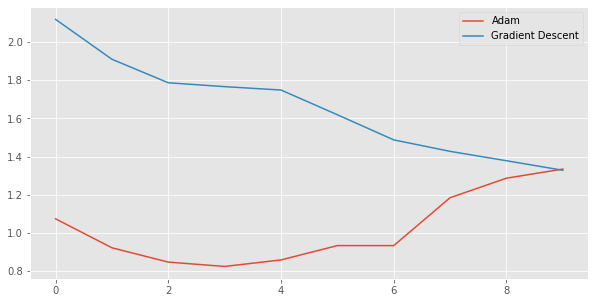

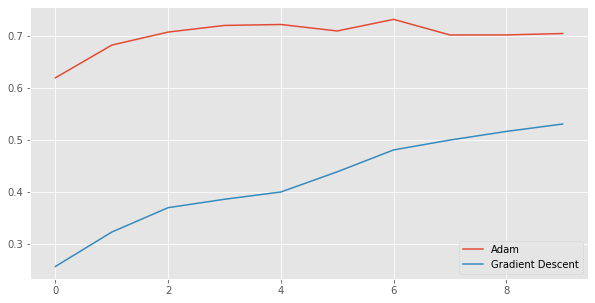

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_adam.history['val_loss'])
plt.plot(history_sgd.history['val_loss'])
plt.legend(['Adam', 'Gradient Descent'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_adam.history['val_accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.legend(['Adam', 'Gradient Descent'])
plt.show()

## Small Dataset

In [ ]:
data = None
label = None
for i in range(0, 10):
  class_data = X_train[np.random.choice(np.where(train_label == i)[0], size=600, replace=False)]
  class_label = np.ones((600, 1)) * i
  if data is None:
    data = class_data
    label = class_label
  else:
    data = np.concatenate([data, class_data], axis=0)
    label = np.concatenate([label, class_label], axis=0)

label = keras.utils.to_categorical(label, 10)

In [ ]:
model_with_small_data = createModel()
model_with_small_data.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],)

history_small = model_with_small_data.fit(data, label,
              batch_size=128,
              epochs=50,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/50
47/47 [==============================] - 2s 31ms/step - loss: 2.2453 - accuracy: 0.1319 - val_loss: 1.9071 - val_accuracy: 0.2662
Epoch 2/50
47/47 [==============================] - 1s 15ms/step - loss: 1.9429 - accuracy: 0.2680 - val_loss: 1.7840 - val_accuracy: 0.3366
Epoch 3/50
47/47 [==============================] - 1s 15ms/step - loss: 1.6712 - accuracy: 0.3659 - val_loss: 1.6941 - val_accuracy: 0.3776
Epoch 4/50
47/47 [==============================] - 1s 15ms/step - loss: 1.5763 - accuracy: 0.4087 - val_loss: 1.5056 - val_accuracy: 0.4447
Epoch 5/50
47/47 [==============================] - 1s 15ms/step - loss: 1.4552 - accuracy: 0.4598 - val_loss: 1.5114 - val_accuracy: 0.4477
Epoch 6/50
47/47 [==============================] - 1s 15ms/step - loss: 1.3953 - accuracy: 0.4863 - val_loss: 1.4159 - val_accuracy: 0.4888
Epoch 7/50
47/47 [==============================] - 1s 15ms/step - loss: 1.2936 - accuracy: 0.5297 - val_loss: 1.4097 - val_accuracy: 0.4969
Epoch 8/50
47

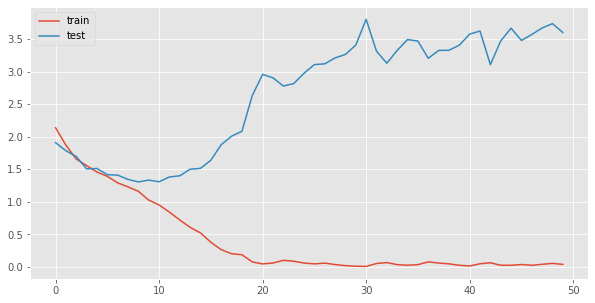

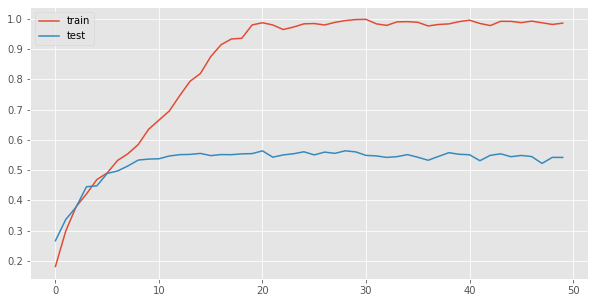

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_small.history['loss'])
plt.plot(history_small.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_small.history['accuracy'])
plt.plot(history_small.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

## Bigger Kernel


In [ ]:
big_model = Sequential(name="MyConvNet")
## 32*32*3
big_model.add(Conv2D(32, (7, 7), padding='same', activation='relu' ,input_shape=X_train.shape[1:], name="conv11"))
big_model.add(MaxPooling2D(pool_size=(2, 2), name="pooling1"))
## 16*16*32
big_model.add(Conv2D(64, (7, 7), padding='same', activation='relu', name='conv21'))
big_model.add(MaxPooling2D(pool_size=(2, 2), name='pooling2'))
## 8*8*64
big_model.add(Conv2D(128, (7, 7), padding='same', activation='relu', name='conv31'))
big_model.add(MaxPooling2D(pool_size=(2, 2), name='pooling3'))
## 4*4*128
big_model.add(Flatten())
## 2048
big_model.add(Dense(1024, activation='relu', name='FC1'))
big_model.add(Dense(512, activation='relu', name='FC2'))
big_model.add(Dense(10, activation='softmax', name='FC3'))

big_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],)

history_big = big_model.fit(X_train, y_train,
              batch_size=128,
              epochs=100,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/100
391/391 [==============================] - 38s 13ms/step - loss: 1.8485 - accuracy: 0.3062 - val_loss: 1.3143 - val_accuracy: 0.5257
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 1.1959 - accuracy: 0.5715 - val_loss: 1.1140 - val_accuracy: 0.6079
Epoch 3/100
391/391 [==============================] - 4s 11ms/step - loss: 0.9712 - accuracy: 0.6543 - val_loss: 0.9895 - val_accuracy: 0.6523
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 0.7826 - accuracy: 0.7245 - val_loss: 1.0282 - val_accuracy: 0.6446
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 0.6555 - accuracy: 0.7705 - val_loss: 0.9429 - val_accuracy: 0.6810
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 0.5221 - accuracy: 0.8152 - val_loss: 0.9793 - val_accuracy: 0.6942
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 0.4024 - accuracy: 0.8576 - val_loss: 1.0535 - val_accuracy

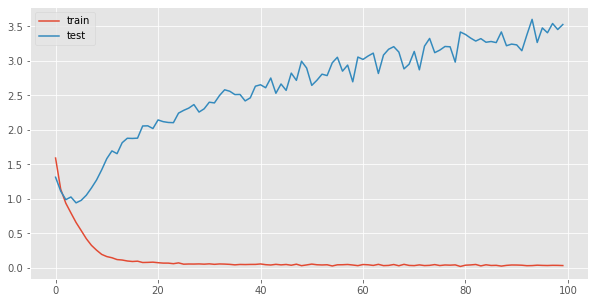

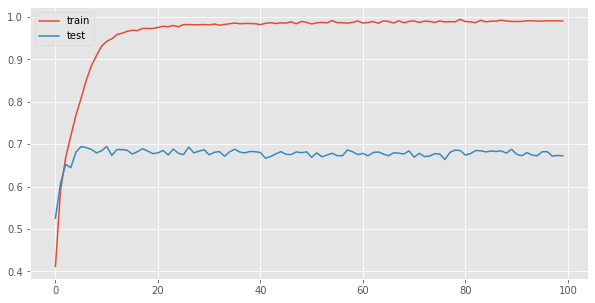

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_big.history['loss'])
plt.plot(history_big.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_big.history['accuracy'])
plt.plot(history_big.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

## Dropout

In [ ]:
model_dropout = Sequential(name="MyConvNet")
## 32*32*3
model_dropout.add(Conv2D(32, (5, 5), padding='same', activation='relu' ,input_shape=X_train.shape[1:], name="conv1"))
model_dropout.add(MaxPooling2D(pool_size=(2, 2), name="pooling1"))
model_dropout.add(Dropout(0.2))
## 16*16*32
model_dropout.add(Conv2D(64, (5, 5), padding='same', activation='relu', name='conv2'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2), name='pooling2'))
model_dropout.add(Dropout(0.2))
## 8*8*64
model_dropout.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2), name='pooling3'))
model_dropout.add(Dropout(0.2))
## 4*4*128
model_dropout.add(Flatten())
model_dropout.add(Dropout(0.3))
## 2048
model_dropout.add(Dense(1024, activation='relu', name='FC1'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(512, activation='relu', name='FC2'))
model_dropout.add(Dropout(0.4))
model_dropout.add(Dense(10, activation='softmax', name='FC3'))


model_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],)

history_dropout = model_dropout.fit(X_train, y_train,
              batch_size=128,
              epochs=100,
              verbose=1,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/100
391/391 [==============================] - 5s 10ms/step - loss: 1.9417 - accuracy: 0.2686 - val_loss: 1.3469 - val_accuracy: 0.5268
Epoch 2/100
391/391 [==============================] - 4s 9ms/step - loss: 1.3565 - accuracy: 0.5086 - val_loss: 1.1104 - val_accuracy: 0.6023
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 1.1655 - accuracy: 0.5786 - val_loss: 1.0102 - val_accuracy: 0.6478
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 1.0648 - accuracy: 0.6206 - val_loss: 0.9530 - val_accuracy: 0.6664
Epoch 5/100
391/391 [==============================] - 4s 9ms/step - loss: 0.9834 - accuracy: 0.6518 - val_loss: 0.8936 - val_accuracy: 0.6860
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 0.9187 - accuracy: 0.6753 - val_loss: 0.8337 - val_accuracy: 0.7111
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 0.8675 - accuracy: 0.6979 - val_loss: 0.7845 - val_accuracy: 0.726

In [ ]:
model_dropout.save_weights('./with_dropout.h5')

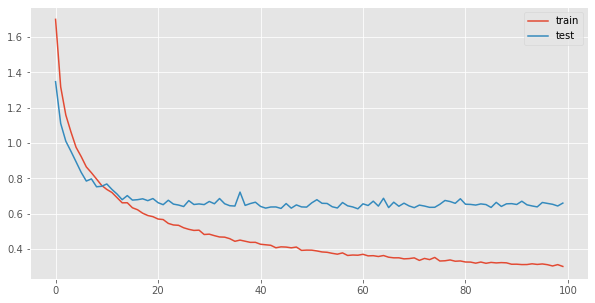

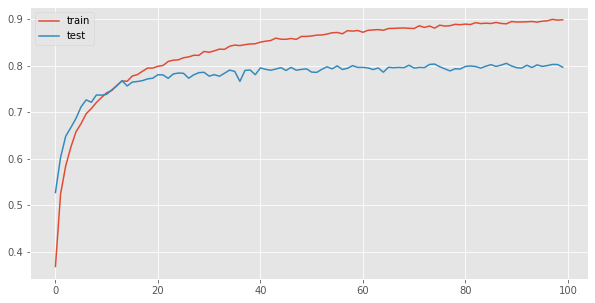

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts


In [ ]:
# Score trained model.
scores = model_dropout.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_dropout.predict(X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6598 - accuracy: 0.7963
Test loss: 0.6597524881362915
Test accuracy: 0.7962999939918518


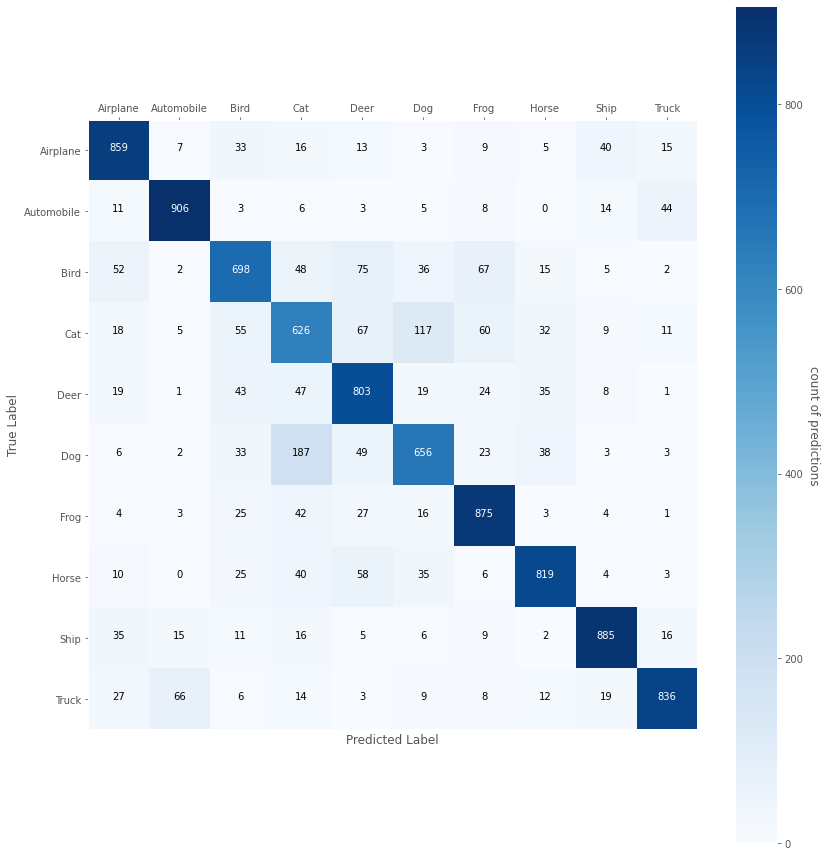

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.grid(False)
plt.show()